In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, t, ttest_ind, ttest_1samp
import seaborn as sns
import math

anggur = pd.read_csv("anggur.csv")

# No 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [60]:
desc = anggur.describe(include = [np.number])
desc= desc.rename(index={"50%": "median"})
desc.loc['modus'] = anggur.mode(numeric_only=True).iloc[0]
desc.loc["variansi"] = anggur.var()
desc.loc['range'] = desc.loc['max'] - desc.loc['min']
desc.loc['IQR'] = desc.loc['75%'] - desc.loc['25%']
desc.loc['skewness'] = anggur.skew()
desc.loc['kurtosis'] = anggur.kurtosis()
desc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.152530,0.520839,0.270517,2.567104,0.081195,14.907679,40.290150,0.995925,3.303610,0.598390,10.592280,7.958000
std,1.201598,0.095848,0.049098,0.987915,0.020111,4.888100,9.965767,0.002020,0.104875,0.100819,1.510706,0.902802
min,3.320000,0.139900,0.116700,0.032555,0.015122,0.194679,3.150000,0.988800,2.970000,0.290000,6.030000,5.000000
25%,6.377500,0.456100,0.237800,1.896330,0.066574,11.426717,33.785000,0.994600,3.230000,0.530000,9.560000,7.000000
median,7.150000,0.524850,0.272200,2.519430,0.082167,14.860346,40.190000,0.996000,3.300000,0.595000,10.610000,8.000000
75%,8.000000,0.585375,0.302325,3.220873,0.095312,18.313098,47.022500,0.997200,3.370000,0.670000,11.622500,9.000000
max,11.490000,0.805100,0.409600,5.550755,0.140758,27.462525,69.960000,1.002600,3.710000,0.960000,15.020000,10.000000
modus,6.540000,0.554600,0.301900,0.032555,0.015122,0.194679,35.200000,0.995900,3.340000,0.590000,9.860000,8.000000
variansi,1.443837,0.009187,0.002411,0.975977,0.000404,23.893519,99.316519,0.000004,0.010999,0.010164,2.282233,0.815051


# No 2
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

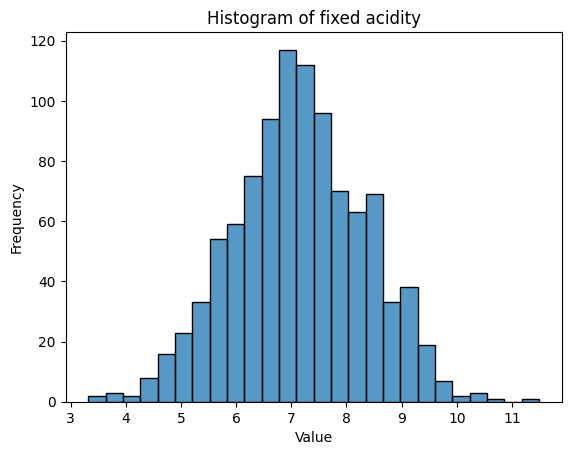

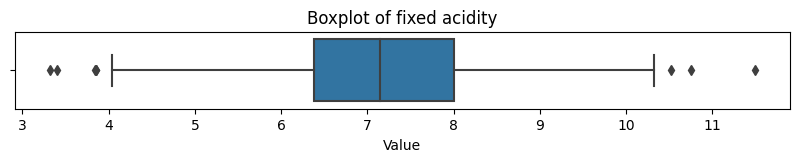

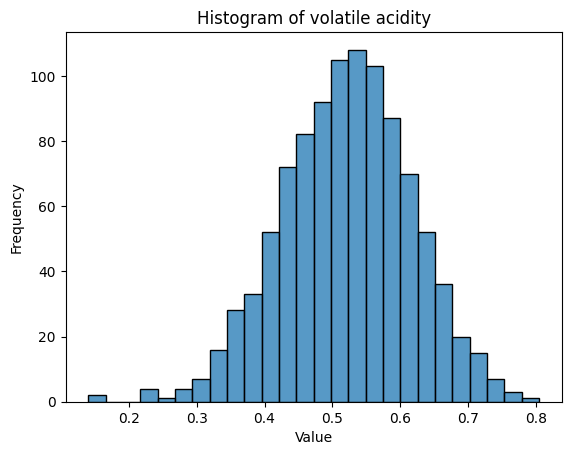

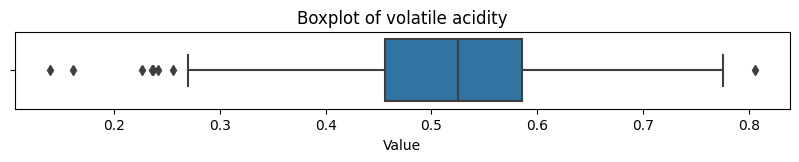

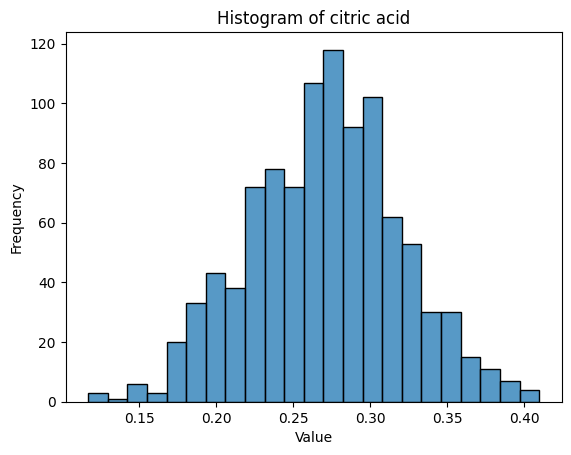

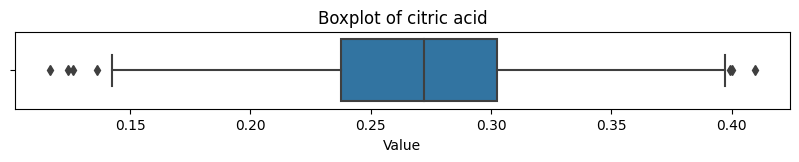

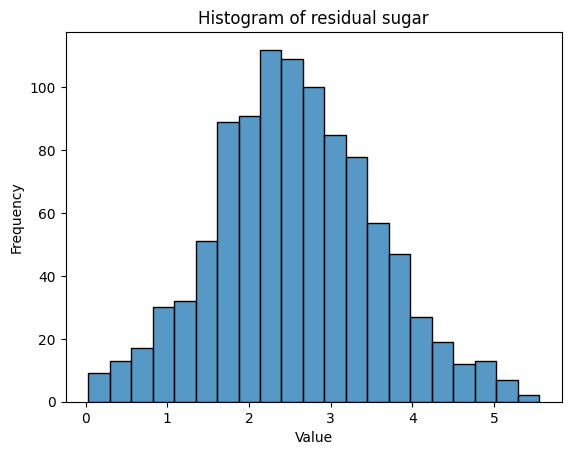

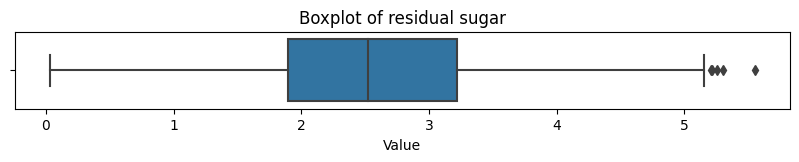

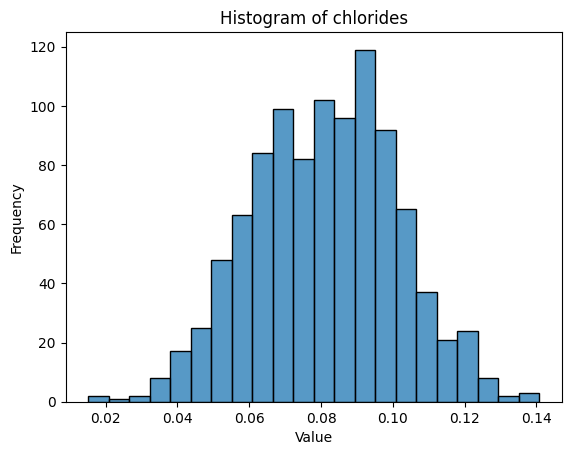

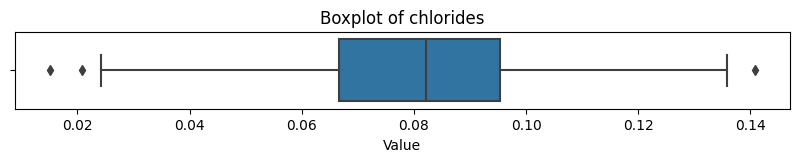

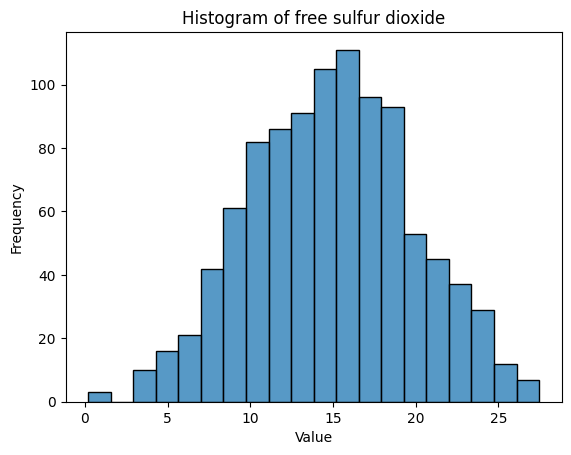

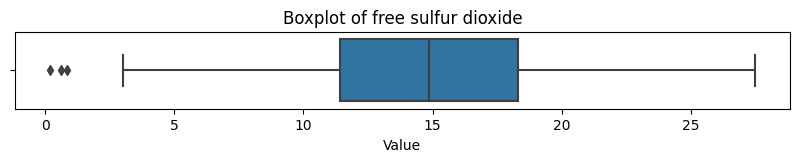

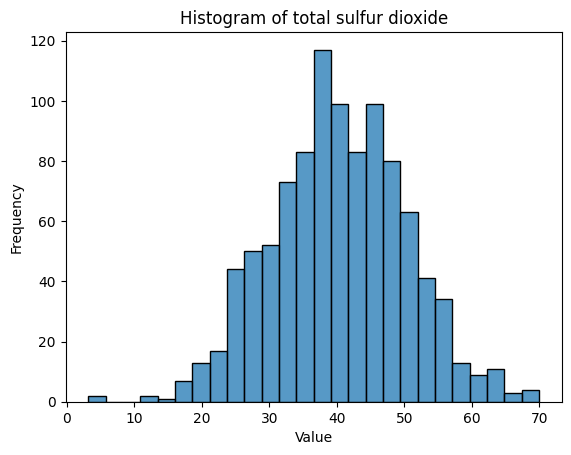

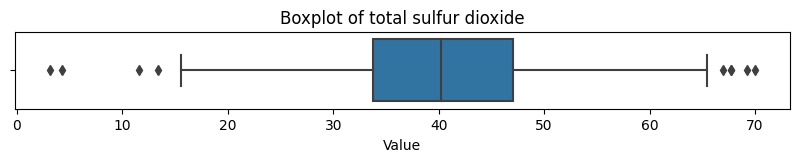

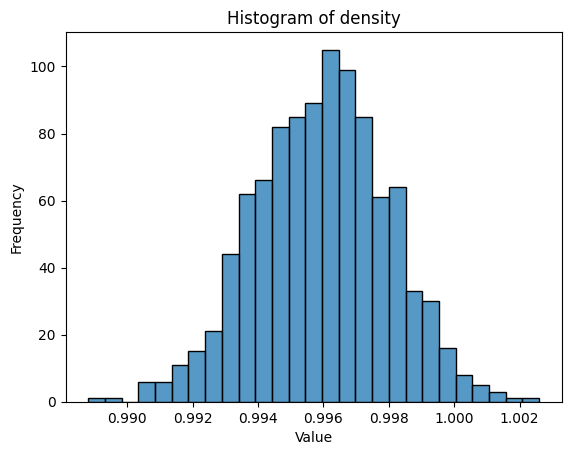

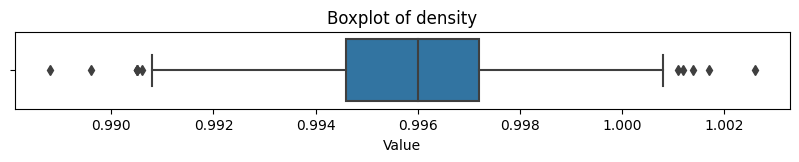

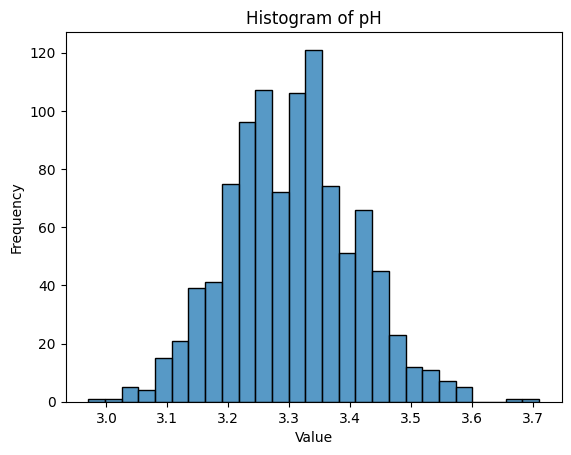

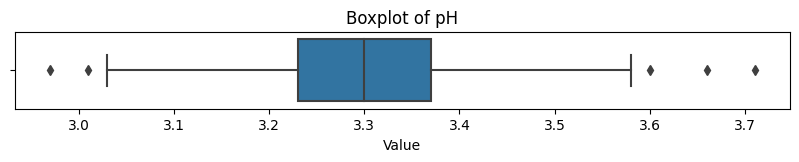

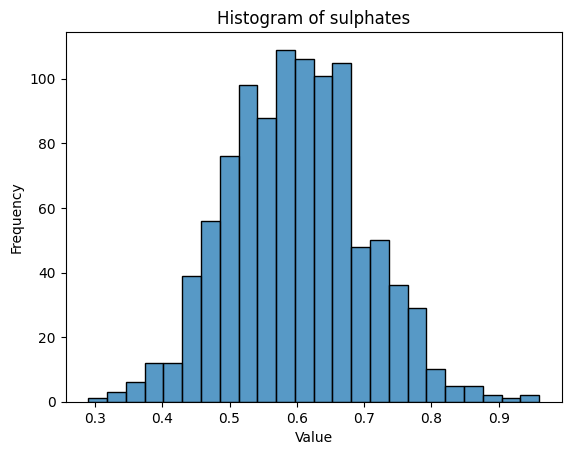

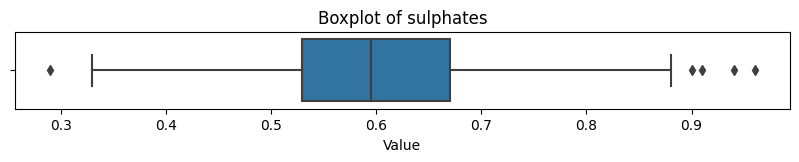

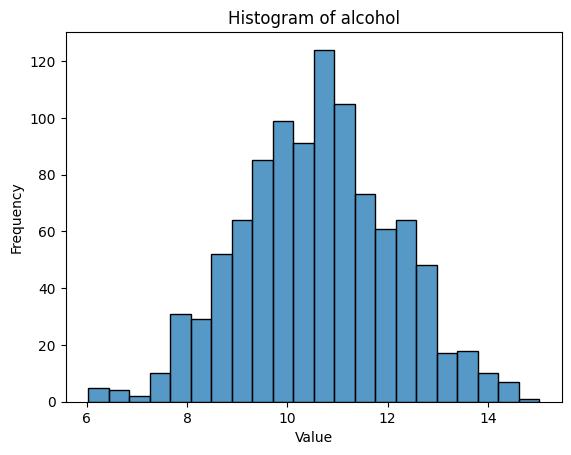

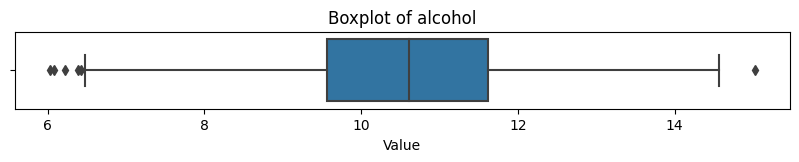

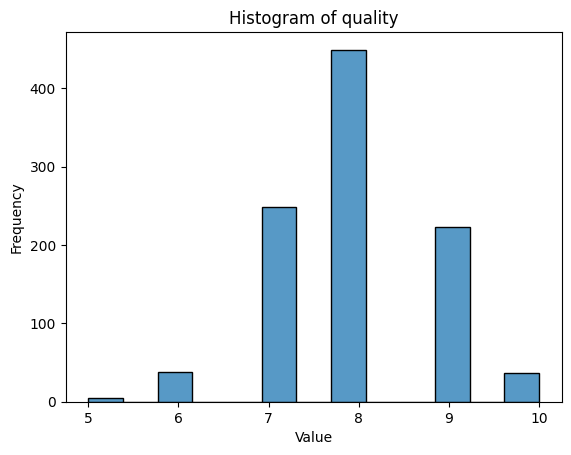

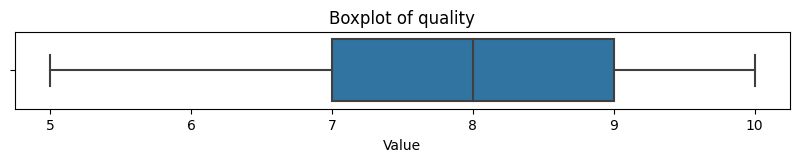

In [61]:
#Loop untuk setiap kolom yang datanya numerik
for col in anggur.select_dtypes(include=[np.number]):
    
    #Histogram
    sns.histplot(anggur[col], bins="auto")
    plt.title(f'Histogram of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()



    #Boxplot
    plt.figure(figsize = (10,1))
    sns.boxplot(data = anggur, x = anggur[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Value')
    plt.show()

## Penjelasan Histogram dan Boxplot

# No 3
Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

fixed acidity is normally distributed


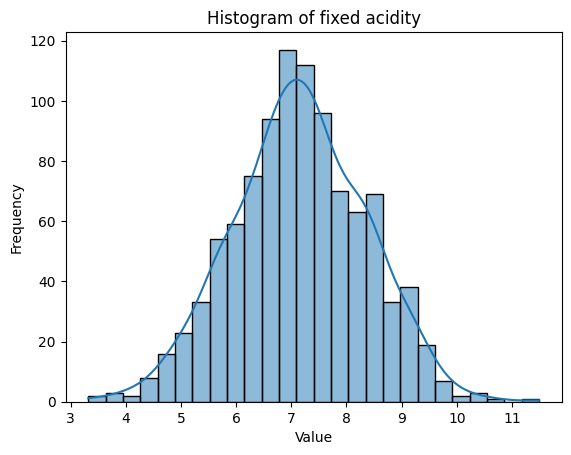

volatile acidity is normally distributed


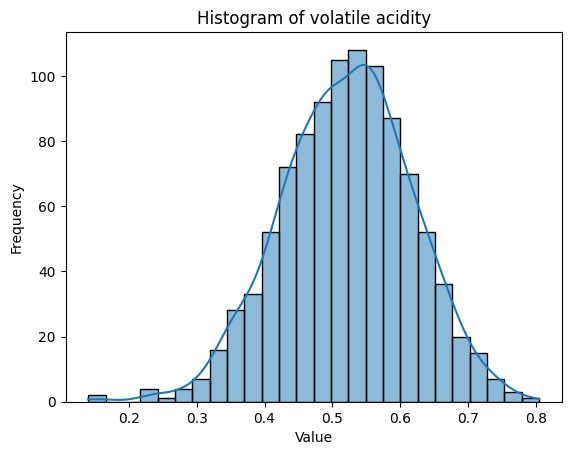

citric acid is normally distributed


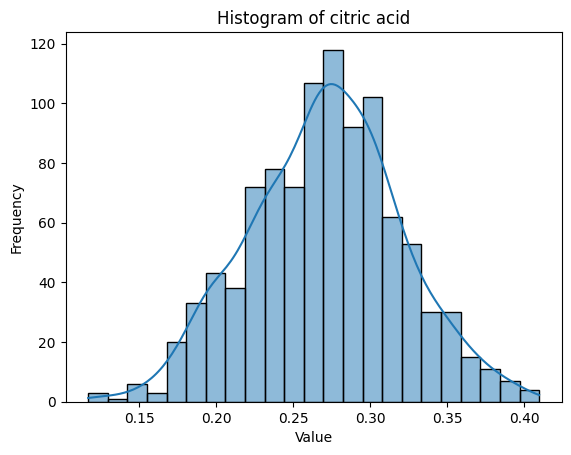

residual sugar is normally distributed


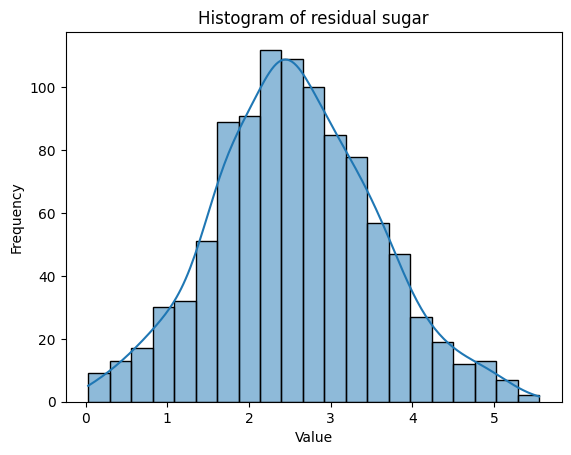

chlorides is normally distributed


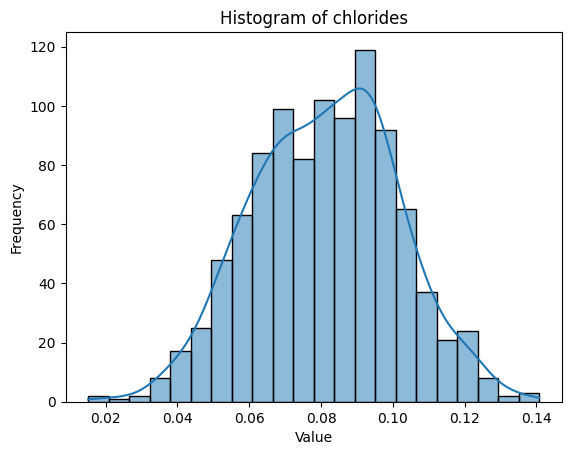

free sulfur dioxide is not normally distributed


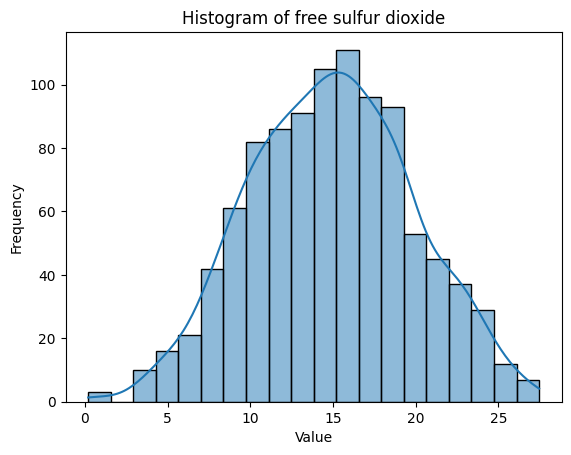

total sulfur dioxide is not normally distributed


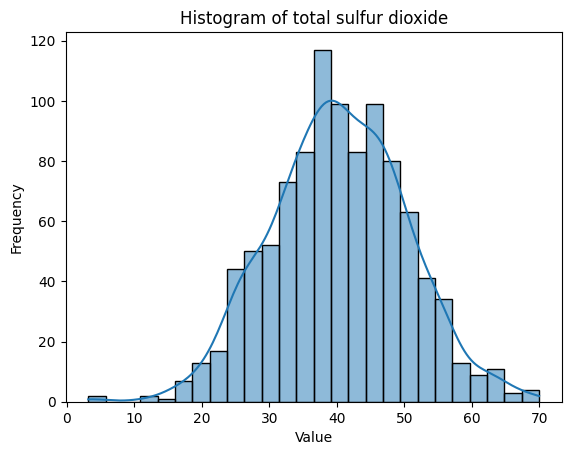

density is normally distributed


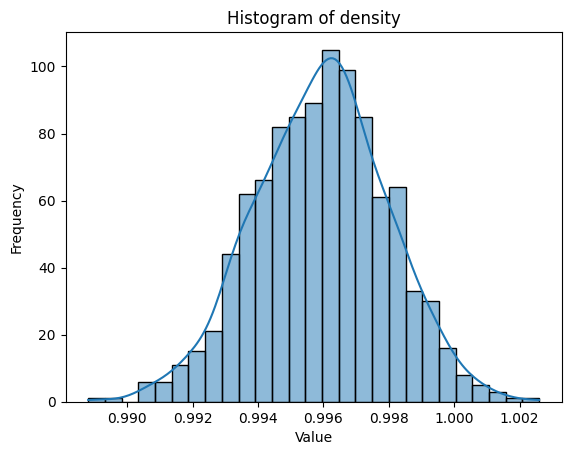

pH is normally distributed


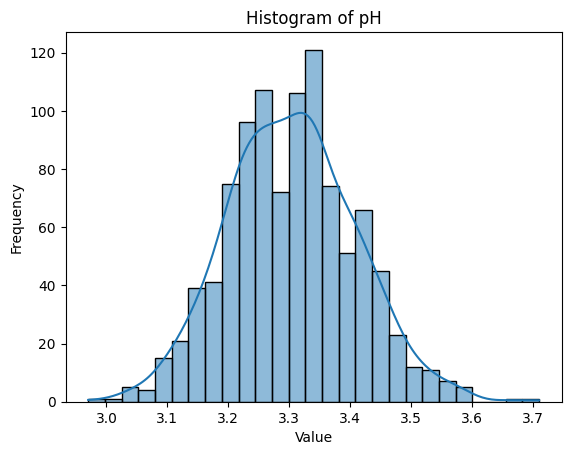

sulphates is normally distributed


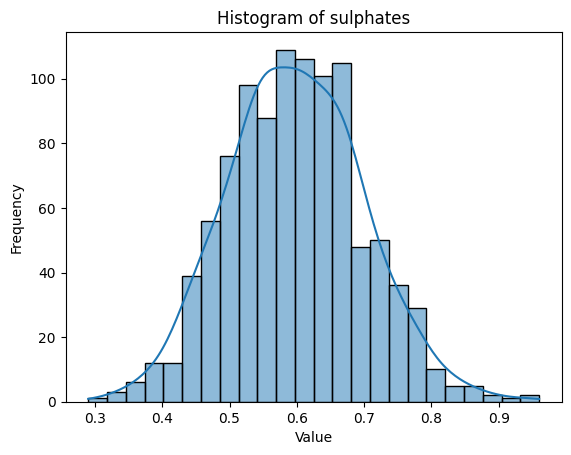

alcohol is normally distributed


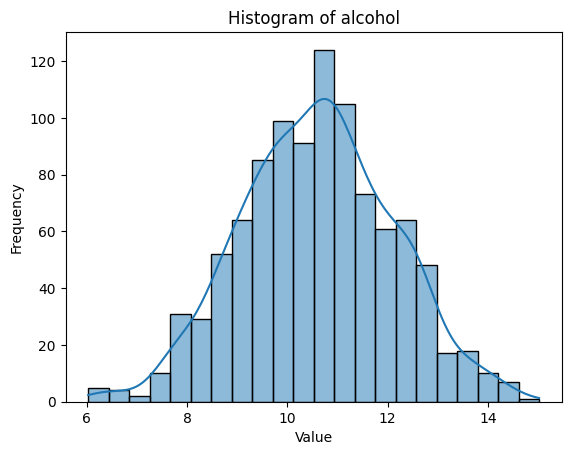

quality is normally distributed


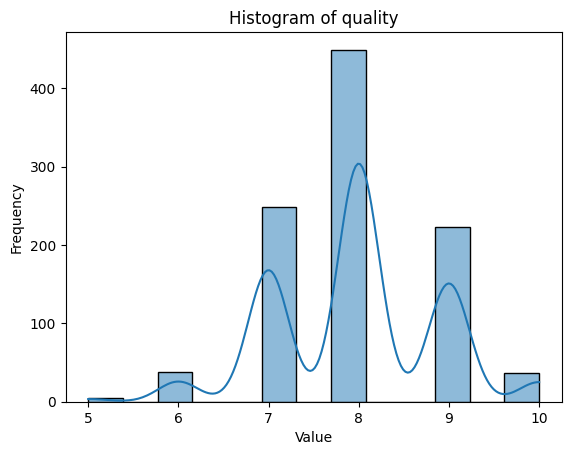

In [62]:
from scipy.stats import chisquare

for col in anggur.select_dtypes(include=[np.number]):
    stat, p = chisquare(anggur[col])
    alpha = 0.05
    
    if p > alpha:
        print(f'{col} is normally distributed')
    else:
        print(f'{col} is not normally distributed')
    
    sns.histplot(anggur[col], bins="auto", kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# No 4
Melakukan test hipotesis 1 sampel,
a. Nilai rata-rata pH di atas 3.29?
b. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?
c. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?
d. Nilai rata-rata total sulfur dioxide di bawah 35?
e. Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?

In [37]:
# nomor 4d
anggurSulfurDioxide = anggur['total sulfur dioxide']
mean = anggurSulfurDioxide.mean()
n = len(anggurSulfurDioxide)
std = anggurSulfurDioxide.std()
x = 35

#Langkah 1
#H0 : mean = 35

#Langkah 2
#H1 : mean < 35

#Langkah3
alpha = 0.05

#Langkah 4
df = n - 1
tCrit = t.ppf(1-alpha, df)

#Langkah 5
tValue = ((mean - x)/std * math.sqrt(n))
p_value = t.sf(abs(tValue),df)*2
a, b = ttest_1samp(anggurSulfurDioxide, x)

#Langkah 6
if abs(tValue) > tCrit and p_value < alpha :
    print ("Tolak H0, mean < 35")
else :
    print ("Tidak Tolak H0, mean = 35")
print(tValue)
print(a)
print(tCrit)
print(p_value)
print(b)

Tolak H0, mean < 35
16.786387372296744
16.786387372296744
1.646380345427535
6.733795653979516e-56
6.733795653979516e-56


# No 5
 Melakukan test hipotesis 2 sampel,
a. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom.
Benarkah rata-rata kedua bagian tersebut sama?
b. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah
rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?
c. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan
rata-rata 25 baris pertama kolom Sulphates ?
d. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?
e. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar
daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

In [25]:
# nomor 5a

#f-test dulu (blm)

#asumsi equal = true
n = len(anggur['fixed acidity'])
anggurFixedAcidity1 = anggur['fixed acidity'][:n//2]
anggurFixedAcidity2 = anggur['fixed acidity'][n//2:]
mean1 = anggurFixedAcidity1.mean()
mean2 = anggurFixedAcidity2.mean()
n1 = len(anggurFixedAcidity1)
n2 = len(anggurFixedAcidity2)
std1 = anggurFixedAcidity1.std()
std2 = anggurFixedAcidity2.std()

#Langkah 1
#H0 : mean1 = mean2

#Langkah 2
#H1 : mean1 != mean2

#Langkah3
alpha = 0.05

#Langkah 4
df = n1 + n2 - 2
tCrit = t.ppf(1 - alpha/2, df)

#Langkah 5
stdCombined = ((((n1 -1) * std1 * std1) + ((n2 -1) * std2 * std2)) / (n1 + n2 - 2))
tValue = (mean1 - mean2)/(math.sqrt(stdCombined) * math.sqrt(1/n1 + 1/n2))
p_value = (1-t.cdf(abs(tValue),df))*2
# a, b = ttest_ind(anggurFixedAcidity1,anggurFixedAcidity2, equal_var = True )

#Langkah 6
if abs(tValue) > tCrit and p_value/2 < alpha:
    print ("Tolak H0, mean1 dan mean2 berbeda")
else :
    print ("Tidak Tolak H0, mean1 dan mean2 sama")
# print(tValue)
# print(a)
# print(tCrit)
# print(p_value)
# print(b)

Tidak Tolak H0, mean1 dan mean2 sama


In [58]:
# nomor 5b

#f-test dulu (blm)

#asumsi equal = true
n = len(anggur['chlorides'])
anggurChrolides1 = anggur['chlorides'][:n//2]
anggurChrolides2 = anggur['chlorides'][n//2:]
mean1 = anggurChrolides1.mean()
mean2 = anggurChrolides2.mean()
n1 = len(anggurChrolides1)
n2 = len(anggurChrolides2)
std1 = anggurChrolides1.std()
std2 = anggurChrolides2.std()
d0 = 0.001

#Langkah 1
#H0 : mean1 - mean2 = 0.001

#Langkah 2
#H1 : mean1 - mean2 != 0.001

#Langkah3
alpha = 0.05

#Langkah 4
df = n1 + n2 - 2
tCrit = t.ppf(1-alpha/2, df)

#Langkah 5
stdCombined = ((((n1 -1) * std1 * std1) + ((n2 -1) * std2 * std2)) / (n1 + n2 - 2))
tValue = (mean1 - mean2-d0)/(math.sqrt(stdCombined) * math.sqrt(1/n1 + 1/n2))
p_value = (1-t.cdf(abs(tValue),df))*2

#Langkah 6
if abs(tValue) > tCrit and p_value/2 < alpha :
    print ("Tolak H0, mean1 - mean2 != 0.001")
else :
    print ("Tidak Tolak H0, mean1 - mean2 = 0.001")
print(tValue)
print(tCrit)
print(p_value)

Tidak Tolak H0, mean1 - mean2 = 0.001
-0.467317122852132
1.9623438462163336
0.640375021315678


In [53]:
# nomor 5c

#f-test dulu (blm)

#asumsi equal = false (blm ganti rumus tapi hasil sama aja)
anggurVolatileAcidity = anggur['volatile acidity'][:25]
anggurSulphates = anggur['sulphates'][:25]
mean1 = anggurVolatileAcidity.mean()
mean2 = anggurSulphates.mean()
n1 = len(anggurVolatileAcidity)
n2 = len(anggurSulphates)
std1 = anggurVolatileAcidity.std()
std2 = anggurSulphates.std()

#Langkah 1
#H0 : mean1 = mean2

#Langkah 2
#H1 : mean1 != mean2

#Langkah3
alpha = 0.05

#Langkah 4
# df2 = n1 + n2 -2
df = ((std1**2/n1 + std2**2/n2)**2)/(((std1**2/n1)**2)/(n1-1) + ((std2**2/n2)**2)/(n2-1))
tCrit = t.ppf(1-alpha/2, df)

#Langkah 5
# stdCombined = ((((n1 -1) * std1 * std1) + ((n2 -1) * std2 * std2)) / (n1 + n2 - 2))
# tValue2 = (mean1 - mean2)/(math.sqrt(stdCombined) * math.sqrt(1/n1 + 1/n2))
tValue = (mean1 - mean2) / math.sqrt(std1*std1/n1 + std2*std2/n2)
p_value = (1-t.cdf(abs(tValue),df))*2
# a, b = ttest_ind(anggurVolatileAcidity,anggurSulphates, equal_var = False )

#Langkah 6
if abs(tValue) > tCrit and p_value/2 < alpha:
    print ("Tolak H0, mean1 dan mean2 berbeda")
else :
    print ("Tidak Tolak H0, mean1 dan mean2 sama")
# print(tValue)
# # print(tValue2)
# print(a)
# print(tCrit)
# print(p_value)
# print(b)

Tolak H0, mean1 dan mean2 berbeda
